<a href="https://colab.research.google.com/github/jsmazorra/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/DS-Unit-4-Sprint-2-Neural-Networks/Johan_Mazorra_LS_DS13_423_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
##### Your Code Here #####

# Import all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(42)

# Load the data.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [2]:
# Let's scale the data.

scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

[[2.41189924e-03 0.00000000e+00 1.59296858e-02 ... 4.10962409e-02
  7.76718953e-01 3.66343633e-02]
 [4.07923050e-05 1.54587284e-01 3.80378407e-03 ... 2.75446433e-02
  7.40857215e-01 5.82747215e-03]
 [6.34505528e-03 0.00000000e+00 2.34463745e-02 ... 2.61666721e-02
  4.86441025e-01 4.22293817e-03]
 ...
 [7.29281484e-05 7.36435428e-02 1.27508534e-02 ... 3.55593107e-02
  7.62210668e-01 1.64751126e-02]
 [4.37205159e-03 0.00000000e+00 3.98313637e-02 ... 2.99040371e-02
  5.32881804e-01 3.21214113e-02]
 [3.09311543e-05 1.28969372e-01 6.29800433e-03 ... 3.35320367e-02
  8.09712706e-01 9.41476414e-03]]


In [3]:
X_train.shape

(404, 13)

In [4]:
# Let's make a model.

model = Sequential(name="Boston_Housing")

model.add(Dense(24, input_dim=13, activation='relu'))
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse',
             optimizer='adam',
             metrics=['mse','mae','mape'])

model.summary()

Model: "Boston_Housing"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                400       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Now, let's run the model.
housing = model.fit(X_train,
                   y_train,
                   epochs=500,
                   validation_split=0.1,
                   verbose=False)

scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]}')

4/4 [==============================] - 0s 3ms/step - loss: 27.9767 - mse: 27.9767 - mae: 3.6219 - mape: 17.8251
mse: 27.976675033569336


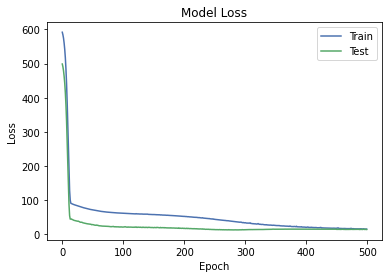

In [6]:
# This is the visualization for the training.
plt.style.use(['seaborn-deep'])
plt.plot(housing.history['loss'])
plt.plot(housing.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
# Now we're going to make a linear regression model for the same data.
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [8]:
# Accuracy comparison.
print('Keras MSE:', (scores[1]))
print('LR MSE:', mean_squared_error(y_test, y_pred))

Keras MSE: 27.976675033569336
LR MSE: 18.16551049349646


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
##### Your Code Here #####

# Let's import the Fashion-MNIST dataset.
((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train[0].shape

(28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

In [0]:
# Let's reshape the data.

X_train = X_train.reshape(60000, 784) # 28 * 28 is 784
X_test = X_test.reshape(10000, 784)

# And now, let's make sure they're floats.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [20]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
# Let's create the model.

fmnist_model = Sequential()

fmnist_model.add(Dense(16, input_dim=784, activation='relu'))
fmnist_model.add(Dense(16))
fmnist_model.add(LeakyReLU(alpha=0.05))
fmnist_model.add(Dense(16, activation='relu'))
fmnist_model.add(Dense(10, activation='softmax'))

fmnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adamax',
                    metrics=['accuracy',
                            'categorical_accuracy',
                            'cosine_proximity'])

fmnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170       
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [22]:
fashion = fmnist_model.fit(X_train, y_train, batch_size=50000,
                           epochs=500, validation_split=.1,
                           verbose=1)
scores = fmnist_model.evaluate(X_test, y_test)
print(f'{fmnist_model.metrics_names[1]}: {scores[1]*100}')

Epoch 1/500
2/2 [==============================] - 0s 104ms/step - loss: 41.9066 - accuracy: 0.0946 - categorical_accuracy: 0.0946 - cosine_proximity: 0.0998 - val_loss: 21.7798 - val_accuracy: 0.0983 - val_categorical_accuracy: 0.0983 - val_cosine_proximity: 0.1095
Epoch 2/500
2/2 [==============================] - 0s 38ms/step - loss: 21.6435 - accuracy: 0.0976 - categorical_accuracy: 0.0976 - cosine_proximity: 0.1097 - val_loss: 14.0483 - val_accuracy: 0.1150 - val_categorical_accuracy: 0.1150 - val_cosine_proximity: 0.1337
Epoch 3/500
2/2 [==============================] - 0s 29ms/step - loss: 14.0534 - accuracy: 0.1196 - categorical_accuracy: 0.1196 - cosine_proximity: 0.1377 - val_loss: 9.8152 - val_accuracy: 0.1130 - val_categorical_accuracy: 0.1130 - val_cosine_proximity: 0.1374
Epoch 4/500
2/2 [==============================] - 0s 41ms/step - loss: 9.8471 - accuracy: 0.1148 - categorical_accuracy: 0.1148 - cosine_proximity: 0.1407 - val_loss: 7.3756 - val_accuracy: 0.1198 - va

In [23]:
# Yeah 51% accuracy is not what I was looking for, let me try to make it higher.

fashion = fmnist_model.fit(X_train, y_train, batch_size=128,
                           epochs=20, validation_split=.1,
                           verbose=1)
scores = fmnist_model.evaluate(X_test, y_test)
print(f'{fmnist_model.metrics_names[1]}: {scores[1]*100}')

Epoch 1/20
422/422 [==============================] - 1s 2ms/step - loss: 1.1264 - accuracy: 0.6030 - categorical_accuracy: 0.6030 - cosine_proximity: 0.6716 - val_loss: 1.0639 - val_accuracy: 0.6595 - val_categorical_accuracy: 0.6595 - val_cosine_proximity: 0.7010
Epoch 2/20
422/422 [==============================] - 1s 2ms/step - loss: 0.9816 - accuracy: 0.6541 - categorical_accuracy: 0.6541 - cosine_proximity: 0.7176 - val_loss: 0.9402 - val_accuracy: 0.6560 - val_categorical_accuracy: 0.6560 - val_cosine_proximity: 0.7288
Epoch 3/20
422/422 [==============================] - 1s 2ms/step - loss: 0.8876 - accuracy: 0.6835 - categorical_accuracy: 0.6835 - cosine_proximity: 0.7448 - val_loss: 0.8617 - val_accuracy: 0.7013 - val_categorical_accuracy: 0.7013 - val_cosine_proximity: 0.7512
Epoch 4/20
422/422 [==============================] - 1s 2ms/step - loss: 0.7918 - accuracy: 0.7089 - categorical_accuracy: 0.7089 - cosine_proximity: 0.7706 - val_loss: 0.7860 - val_accuracy: 0.7002 - 

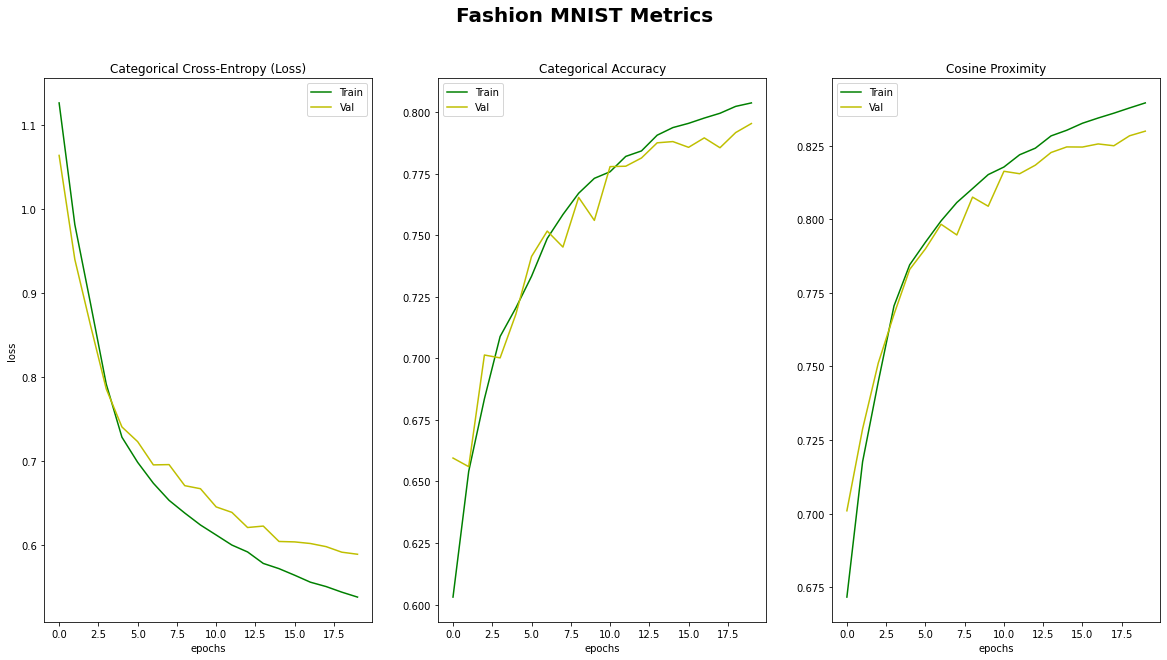

In [30]:
# Now that's much better.

# Let's make some visualizations of the summary of the models.

fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(20,10))
fig.suptitle('Fashion MNIST Metrics', fontsize=20, fontweight='bold')

ax1.plot(fashion.history['loss'], color= 'g', label='Train')
ax1.plot(fashion.history['val_loss'], color='y', label='Val')
ax1.legend()
ax1.set(title='Categorical Cross-Entropy (Loss)', xlabel='epochs', ylabel='loss')

ax2.plot(fashion.history['categorical_accuracy'], color='g', label='Train')
ax2.plot(fashion.history['val_categorical_accuracy'], color='y', label='Val')
ax2.legend()
ax2.set(title='Categorical Accuracy', xlabel='epochs', ylabel='')

ax3.plot(fashion.history['cosine_proximity'], color='g', label='Train')
ax3.plot(fashion.history['val_cosine_proximity'], color='y', label='Val')
ax3.legend()
ax3.set(title='Cosine Proximity', xlabel='epochs', ylabel='');

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.